In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import keras
import tensorflow as tf

# Load Cifar10 Dataset from keras

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


## Explore the dataset

In [5]:
print("Image size: ", x_train[0].shape)
print("Label size: ", y_train[0].shape)
print("training samples: ", x_train.shape[0])
print("test samples: ", x_test.shape[0])

Image size:  (32, 32, 3)
Label size:  (1,)
training samples:  50000
test samples:  10000


# Classification Model

In [6]:
vgg19 = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(32, 32, 3),
    pooling=None,
    classifier_activation="softmax",
)

80142336/80134624 [==============================] - 1s 0us/step


In [7]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [8]:
#turn off training of all convolutional layers: 
vgg19.trainable = False
input = keras.layers.Input(shape = (32, 32, 3))
x = vgg19(input, training = False)
y = keras.layers.Flatten()(x)
y = keras.layers.Dense(512, activation = 'relu', kernel_initializer = 'he_uniform')(y)
y = keras.layers.Dropout(0.5)(y)
y = keras.layers.Dense(256, activation = 'relu', kernel_initializer = 'he_uniform')(y)
y = keras.layers.Dropout(0.5)(y)
output = keras.layers.Dense(10, activation='softmax')(y)
model = keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg19 (Functional)           (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0     

In [11]:
model.compile(loss= "sparse_categorical_crossentropy", optimizer='adam', metrics = ['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data = (x_test, y_test))

Epoch 1/40
98/98 [==============================] - 9s 52ms/step - loss: 18.8726 - accuracy: 0.2008 - val_loss: 2.2530 - val_accuracy: 0.1533
Epoch 2/40
98/98 [==============================] - 4s 42ms/step - loss: 2.3033 - accuracy: 0.1863 - val_loss: 2.1061 - val_accuracy: 0.2414
Epoch 3/40
98/98 [==============================] - 4s 41ms/step - loss: 2.1393 - accuracy: 0.2344 - val_loss: 1.8969 - val_accuracy: 0.3400
Epoch 4/40
98/98 [==============================] - 4s 41ms/step - loss: 2.0070 - accuracy: 0.2841 - val_loss: 1.7615 - val_accuracy: 0.3939
Epoch 5/40
98/98 [==============================] - 4s 42ms/step - loss: 1.8925 - accuracy: 0.3228 - val_loss: 1.6450 - val_accuracy: 0.4406
Epoch 6/40
98/98 [==============================] - 4s 41ms/step - loss: 1.7968 - accuracy: 0.3582 - val_loss: 1.5779 - val_accuracy: 0.4503
Epoch 7/40
98/98 [==============================] - 4s 41ms/step - loss: 1.7404 - accuracy: 0.3772 - val_loss: 1.5086 - val_accuracy: 0.4706
Epoch 8/40
9

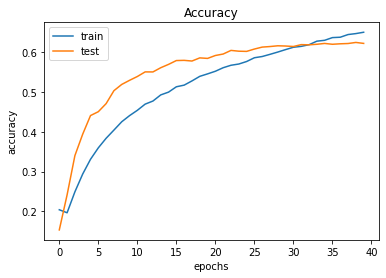

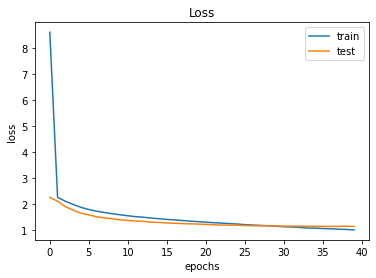

In [58]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(["train", "test"])
plt.figure()
plt.title("Loss")
plt.ylabel("loss")
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.legend(["train", "test"])
plt.show()

In [52]:
import time
start = time.time()
prediction_prob = model.predict(x_train[0:200])
prediction_classes = prediction_prob.argmax(axis=-1)
end = time.time()
print("elapsed: ", end-start)
print(prediction_classes)


elapsed:  0.08221840858459473
[6 9 9 4 1 1 4 7 8 4 4 7 7 3 8 9 9 3 2 6 4 6 6 6 2 6 5 5 7 8 2 9 1 3 2 4 3
 7 1 4 5 2 2 7 1 1 1 2 4 3 9 3 7 1 2 2 2 4 4 9 1 1 8 6 1 1 4 9 7 8 2 9 6 7
 2 1 9 3 3 1 8 5 4 3 2 5 4 7 9 4 6 3 4 8 1 4 1 2 4 1 8 3 1 6 6 1 8 5 2 8 8
 8 1 7 7 9 0 6 9 1 6 4 9 7 6 6 1 9 3 0 6 7 6 7 1 8 1 8 2 8 1 6 5 6 2 4 1 1
 3 4 3 3 7 4 6 8 3 3 7 6 1 8 7 7 6 0 9 5 1 3 8 3 7 3 5 4 1 5 7 2 4 7 5 5 1
 8 9 3 9 0 0 0 8 8 2 9 4 3 5 0]


In [49]:
labels = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
labels = labels.reshape(labels.shape,)
print(labels)

['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']


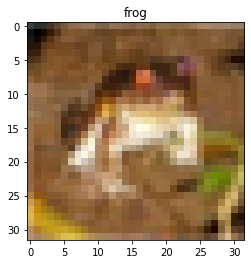

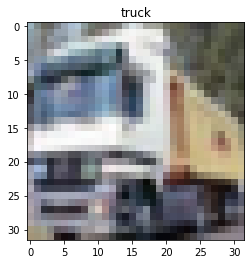

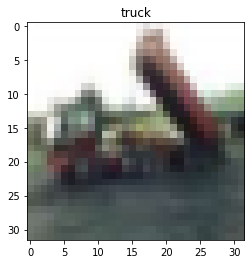

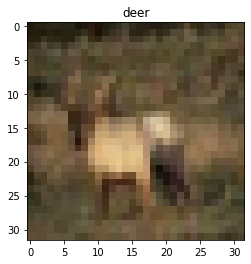

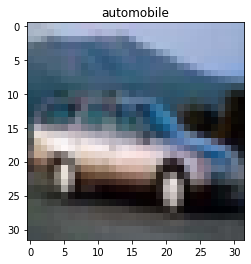

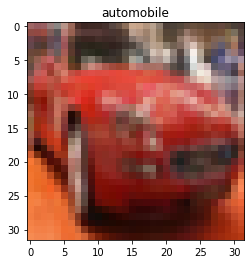

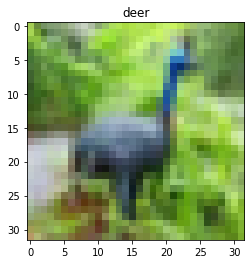

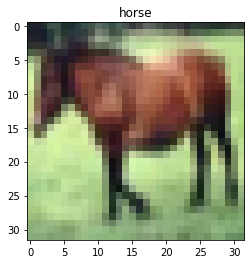

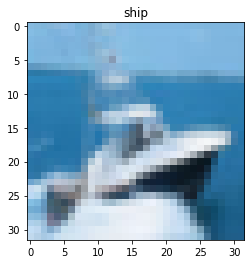

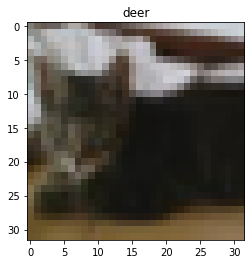

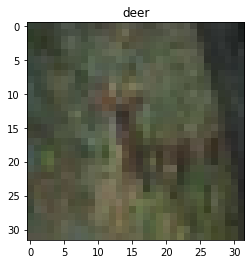

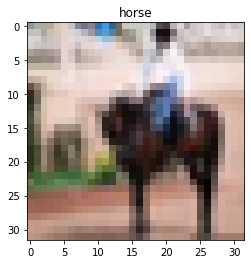

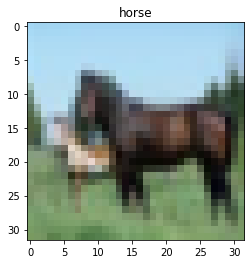

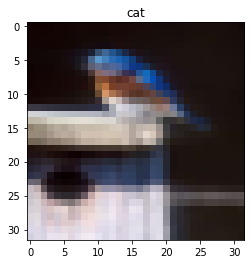

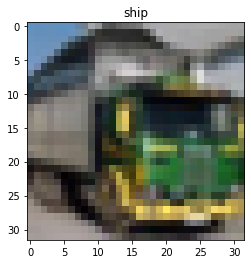

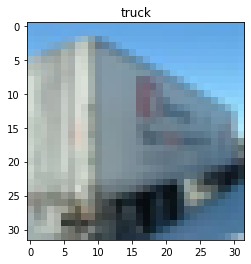

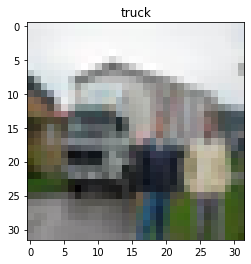

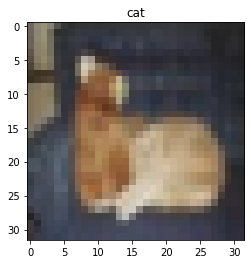

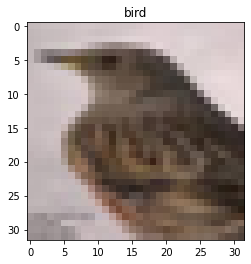

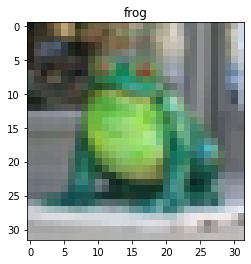

In [55]:
import matplotlib.pyplot as plt

for i in range(0, 20): 
    plt.figure()
    plt.imshow(x_train[i])
    
    plt.title(labels[prediction_classes[i]])
#   print(x_train[i].shape)